## Импорт датасета и предобработка.

In [1]:
import json
import numpy as np
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from matplotlib import pyplot as plt

In [2]:
with open("reviews_data.json", "r") as read_file:
    load_data = json.load(read_file)

In [3]:
reviews = []
reviews += load_data['good']
reviews += load_data['bad']
reviews += load_data['neutral']
len(reviews)

3000

In [4]:
labels = [1 for _ in range(1000)] + [-1 for _ in range(1000)] + [0 for _ in range(1000)]
len(labels)

3000

In [5]:
max_len = 500
training_samples = 2400
max_words = 10000

In [6]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)

In [7]:
sequences = tokenizer.texts_to_sequences(reviews)
len(sequences)

3000

In [8]:
word_index = tokenizer.word_index

In [9]:
data = pad_sequences(sequences, maxlen=max_len)
len(data)

3000

In [10]:
labels = np.asarray(labels)

In [11]:
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

labels = to_one_hot(labels)
labels.shape

(3000, 3)

In [12]:
indices = np.arange(3000)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [13]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_test = data[training_samples:]
y_test = labels[training_samples:]

## Рекуррентные сети.

In [14]:
from keras.layers import LSTM

LSTM_model = Sequential()
LSTM_model.add(Embedding(max_words, 32))
LSTM_model.add(LSTM(32))
LSTM_model.add(Dense(3, activation='softmax'))
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 328,419
Trainable params: 328,419
Non-trainable params: 0
_________________________________________________________________


In [15]:
LSTM_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['acc'])
LSTM_model_history = LSTM_model.fit(X_train, y_train,
                                    epochs=13,
                                    batch_size=128,
                                    validation_split=0.2)

Epoch 1/13
15/15 [==============================] - 4s 162ms/step - loss: 1.0932 - acc: 0.4344 - val_loss: 1.0859 - val_acc: 0.4042
Epoch 2/13
15/15 [==============================] - 2s 127ms/step - loss: 1.0726 - acc: 0.4620 - val_loss: 1.0471 - val_acc: 0.5646
Epoch 3/13
15/15 [==============================] - 2s 127ms/step - loss: 0.9985 - acc: 0.5370 - val_loss: 0.9610 - val_acc: 0.5063
Epoch 4/13
15/15 [==============================] - 2s 139ms/step - loss: 0.8540 - acc: 0.5906 - val_loss: 0.8468 - val_acc: 0.6083
Epoch 5/13
15/15 [==============================] - 2s 130ms/step - loss: 0.7836 - acc: 0.6021 - val_loss: 0.9262 - val_acc: 0.4917
Epoch 6/13
15/15 [==============================] - 2s 126ms/step - loss: 0.7412 - acc: 0.6443 - val_loss: 0.7300 - val_acc: 0.6292
Epoch 7/13
15/15 [==============================] - 2s 130ms/step - loss: 0.6547 - acc: 0.6521 - val_loss: 0.7172 - val_acc: 0.6854
Epoch 8/13
15/15 [==============================] - 2s 126ms/step - loss: 0.

In [16]:
def plotting(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'b', color='blue', label='Training acc')
    plt.plot(epochs, val_acc, 'b', color='orange', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'b', color='blue', label='Training loss')
    plt.plot(epochs, val_loss, 'b', color='orange', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

C:\Users\kozyr\AppData\Local\Temp\ipykernel_24304\2124928173.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', color='blue', label='Training acc')
C:\Users\kozyr\AppData\Local\Temp\ipykernel_24304\2124928173.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', color='orange', label='Validation acc')
C:\Users\kozyr\AppData\Local\Temp\ipykernel_24304\2124928173.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', color='blue', label='Training loss')
C:\Users\kozyr\AppData\Local\Temp\ipykernel_24304\2124928173.py:15: UserWarning:

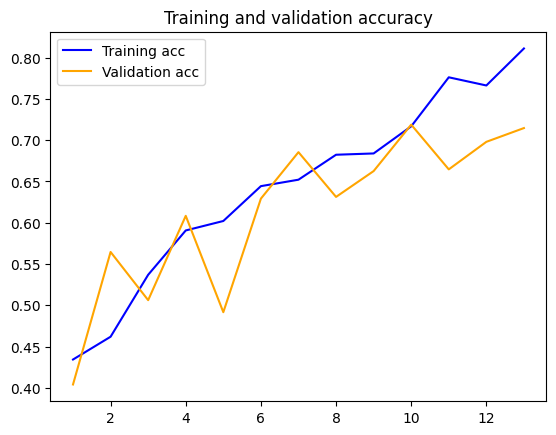

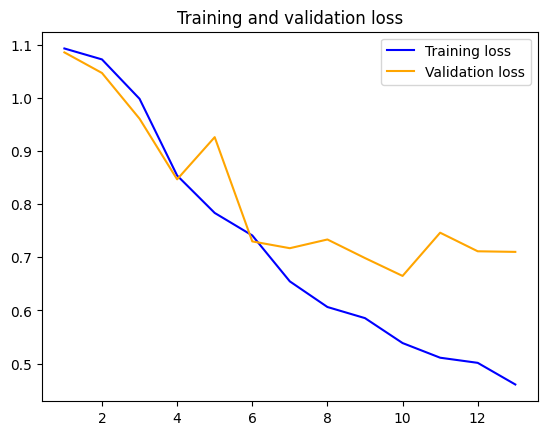

In [17]:
plotting(LSTM_model_history)

In [18]:
LSTM_model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 23ms/step - loss: 0.7288 - acc: 0.6533


[0.7287532687187195, 0.653333306312561]